<h1 style="color:Green;">Week 4 Lab - due by 31st July, 2022 (11:59 pm CDT )</h1> 

## By Shyam Parikh

<a style="color:purple;" href="https://docs.google.com/presentation/d/1_jQKSrS4hiVJaxnFYhRh284AhAbPxI0CL0qAP4Iz-DE/edit#slide=id.p">[Week 4 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to implement machine learning methods and models on classification problems</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [1105]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_multilabel_classification

import pandas_datareader as pdr

<h2 style="color:Green;">Problem 1: SPY Directional Move</h2><br/>

Recall that at the end of the Week 3 lecture, we converted the SPY log return into binary values such that 0 represents a day with negative return and 1 represents a day with positive return. Then, we used the XLK and IYC log returns to predict SPY log return. <br>

The first model we implemented was logistic regression. Let's examine other models and compare their performances.

a) The 'SPY_XLK_IYC.csv' already contained the standardized log return data for SPY, XLK, and IYC from 2018-01-25 to 2022-05-31 (same as the data that fitted our logistic regression on). Also, this data set is already preprocessed, meaning any non-importnat features are dropped, labels are checked to be balanced, and multicollinearity is removed. Please write a function to load the csv file into the etfLogRet variable.

In [1106]:
################ EDIT CODE LINES HERE #################

etfLogRet = pd.read_csv('SPY_XLK_IYC.csv')
etfLogRet

######################################################

,Date,SPY,XLK,IYC
0,1/26/2018,0.011512,0.860039,0.585603
1,1/29/2018,-0.006652,-0.564346,0.036836
2,1/30/2018,-0.010310,-0.560701,-0.499923
3,1/31/2018,0.000497,0.387492,-0.325022
4,2/1/2018,-0.001136,0.009525,-0.742418
...,...,...,...,...
1081,5/24/2022,-0.007663,-0.896779,-1.832777
1082,5/25/2022,0.008796,0.623008,1.723085
1083,5/26/2022,0.019784,1.318438,2.979612
1084,5/27/2022,0.024253,1.864505,1.994546


b) Please split data into 80% training set and 20% testing set.

In [1107]:
################ EDIT CODE LINES HERE #################
FEATURES = etfLogRet.columns[2:]
LABEL = etfLogRet.columns[1]
X_train, X_test, y_train, y_test = train_test_split(etfLogRet.loc[:, FEATURES], etfLogRet.loc[:, LABEL], test_size=0.2, random_state=0)
X_train, X_test = X_train.loc[:, FEATURES], X_test.loc[:, FEATURES]
etfLogRet.SPY = (etfLogRet.SPY > 0).astype(int)
y_test = (y_test > 0).astype(int)
y_train = (y_train > 0).astype(int)
y_test
######################################################

204     0
183     0
356     1
1013    1
272     1
       ..
680     0
644     1
665     0
247     1
1022    0
Name: SPY, Length: 218, dtype: int64

c) Please select ONE classification model to fit the training data. Why did you chose this model?

The classification model that I will be using to fit the training data is the K-Nearest Neighbors. I decided to use this model as the data has no period of training before it could be implemented. The training dataset is stored and the model only learns from this training dataset when it is going to make real time predictions. Another reason why I am implementing this model is because the data is already preprocessed meaning that it is already feature scaled. This dataset that we are using isn't such a large dataset as its sample size is 1086 values. Missing Values were also removed from this dataset which makes this model usable in this situation. Also, if new data were to be added, the K-Nearest Neighbors algorithm would not be affected. 

In [1108]:
################ EDIT CODE LINES TO FIT YOUR MODEL HERE #################
#####                                                   #####
#####    K-NEAREST NEIGHBORS MODEL FOR CLASSIFICATION   #####
#####                                                   #####

from sklearn.neighbors import KNeighborsClassifier
# Specifying the K in K-Fold CV
k_cv = 5
# choose k between 1 to 30
k_range = range(1, 50)
k_accuracy = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, etfLogRet.loc[:, FEATURES], etfLogRet.loc[:, LABEL], cv=k_cv, scoring='accuracy')
    k_accuracy.append(accuracy.mean())
    
#plt.plot(k_range, k_accuracy)
#plt.title('KNN Accuracy Score with '+str(k_cv)+'-Fold Cross Validation')
#plt.xlabel('Value of K for KNN')
#plt.ylabel('Cross-Validated Accuracy Score')
#plt.show()

#Based on the KNN Accuracy Score, a K value of 20 would be good to use, as it represents the highest Cross-Validated Accuracy Score from 1-50. 
# # build KNN model and choose n_neighbors
knn = KNeighborsClassifier(n_neighbors=20)
# train the model
knn.fit(X_train, y_train)
# predicted liquidity strengths 
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)

########################################################################

c) Compare the performance of the model you chose above with that of the logistic regression applied in Week 3 lecture. Which model performs better and why? (Remark: please output proper metrics to support your claim)

The performances of the logistic and KNN models are very similar as indicated by certain metrics.

The K-Nearest Neighbors Model maintains a slightly higher testing accuracy than the Logistic Model. The KNN model has a testing accuracy value of 0.894 whereas the logistic model has a testing accuracy of 0.890 which is quite a small difference. . This also indicates that the KNN model has a smaller testing error than the logistic.  We can tell that the KNN is more accurate than the logistic model. 

They both share the same F1 score for both negative(0) and positive directions(1) with 0.88 and 0.90 respectively. Both values represent above average predictions for the negative direction and the positive direction of SPY. The weighted F1 score for both models is 0.89.

The last indicator that we will look at is the Area Under the Curve Score or AUC for short. This score measures the ability for a classifier to separate the positive and negative classes. The Logistic model has an AUC of 0.970 whereas the KNN model has an AUC of 0.966. This is able to tell us that the Logistic model does a better job of distinguishing the positive and negative direction of SPY. 


Although they have very similar metrics, it may be better to use the logistic regression model because if the size of the dataset increased, it would have been more computationally costly to implement than the logistic regression model. 

In [1109]:
################ EDIT CODE LINES TO RETURN PERFORMANCE METRICS HERE #################

knn_train_error= np.mean(knn_pred_train!=y_train)
knn_test_error= np.mean(knn_pred_test != y_test)
print('KNN Training Error = %.3f' % knn_train_error)
print('KNN Testing Error = %.3f' % knn_test_error)
knn_train_accuracy= knn.score(X_train,y_train)
knn_test_accuracy= knn.score(X_test,y_test)
print('KNN Training Accuracy Score = %.3f' % knn_train_accuracy)
print('KNN Testing Accuracy Score = %.3f' % knn_test_accuracy)
#plot_confusion_matrix(knn, X_test, y_test)
#plt.title("KNN Confusion Matrix")
# storing f1 score
knn_f1_score= f1_score(y_test, knn_pred_test, average='weighted')
# printing full report
print(classification_report(y_test, knn_pred_test))
knn_pred_test_proba = knn.predict_proba(X_test)
knn_auc_score = roc_auc_score(y_test, knn_pred_test_proba[:,1], multi_class='ovr')
print('KNN Classifier: ROC AUC=%.3f' % knn_auc_score)

#####                                           #####
#####           LOGISTIC REGRESSION             #####
#####                                           #####
#              precision    recall  f1-score   support
#           0       0.89      0.86      0.88        99
#           1       0.89      0.92      0.90       119

#    accuracy                           0.89       218
#   macro avg       0.89      0.89      0.89       218
#weighted avg       0.89      0.89      0.89       218

#training accuracy score: 0.8974654377880185
#testing accuracy score: 0.8899082568807339
#No Skill Classifier: ROC AUC=0.500
#Logistic Classifier: ROC AUC=0.970


###################################################################################

KNN Training Error = 0.098
KNN Testing Error = 0.106
KNN Training Accuracy Score = 0.902
KNN Testing Accuracy Score = 0.894
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        99
           1       0.91      0.90      0.90       119

    accuracy                           0.89       218
   macro avg       0.89      0.89      0.89       218
weighted avg       0.89      0.89      0.89       218

KNN Classifier: ROC AUC=0.966


<h2 style="color:Green;">Problem 2: Corporate Bond Ratings Prediction</h2><br/>

Companies issue bonds, which are debt securities, to raise funds that can be used to invest in the long-term future of the company. A corporate bond is a debt instrument from a company that investors can buy and, in doing so, pay the company the value of the bond upfront, which is called the principal amount. In return, the company pays the investor interest (called a coupon rate) on the bond's principal amount via periodic interest payments. At the bond's maturity date, which is typically in one to five years, the principal is paid back to the investor. Before investors buy a corporate bond, they need to know how financially stable the company that issued the bond is because this implies the ability of the company to pay back the bond obligations. Investors know this by looking at the bond ratings. 

According to Fitch Ratings,  bond rating of triple-A (AAA) signifies the highest investment grade and means that there is a very low credit risk. "AA" represents very high credit quality; "A" means high credit quality, and "BBB" is a satisfactory credit quality. These ratings are considered to be investment grade, which means that the security or entity being rated carries a high-enough quality level for most financial institutions to make investments in those securities. "BBB" is the lowest rating of investment-grade securities, while ratings below "BBB", like "C" or "D" is the lowest or junk quality.  

You are the head of Investment Analytics in a hedge fund company. Your subordinates gathered some financial metrics (e.g., current ratio, asset turnover) of 593 companies for you from 1/10/2014 to 9/9/2016. This data set is in the "corporate_rating.csv" file. Your goal is to predcit the bond ratings of companies that exhibit different financial properties based on these metric values. 

<p style="color:red;"> Please do add extra code chunks as needed for this problem. </p>

a) Please load in the financial metrics data that your subordinate collects and drop any columns that are irrelevant to the financial metrics. The remaining columns will be your features.

In [1110]:
################ EDIT CODE LINES HERE #################


DATA = pd.read_csv("corporate_rating.csv")
DATA = DATA.drop("Date",axis = 1)
DATA = DATA.drop("Symbol",axis = 1)
DATA = DATA.drop("Name",axis = 1)
DATA = DATA.drop("Rating Agency Name",axis = 1)

DATA


######################################################

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,11.757767,7.115059,7.057420,1.079762,0.056706,0.086376,1.000000,0.077844,0.069328,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,2.962788,1.294743,0.428234,30.602414,-0.169983,-0.267117,0.198649,-0.248509,-0.189265,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,0.883875,0.842553,0.233830,147.599371,-0.007458,0.000219,0.384390,0.185418,-0.002066,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,0.911713,0.748356,0.310640,131.644566,0.087365,0.130692,0.414916,0.286236,0.021251,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


b) Please identify your explanatory and response variables.

The response variable is the Bond Rating. 
The explanatory variables in this dataset are all of the financial metrics that are used. 
The following metrics are used in the dataset: currentRatio, quickRatio, cashRatio, daysofSalesOutstanding, netProfitMargin, pretaxProfitMargin,grossProfitMargin, operatingProfitMargin, returnOnAssets, returnOnCapitalEmployed, returnOnEquity,assetTurnover, fixedAssetTurnover, debtEquityRatio, debtRatio,freeCashFlowPerShare, cashPerShare, companyEquityMultiplier, ebitPerRevenue, enterpriseValueMultiple, operatingCashFlowPerShare,operatingCashFlowSalesRatio, and payablesTurnover. 

We want to use the financial metrics to calculate the bond rating. 

c) Please use Exploratory Data Analysis (EDA) techniques to pre-process the data set. Rememebr to re-define your X_train, X_test, and FEATURES  variables if you decided to drop any of the features.<br><br>
(Hint 1: if you use feature importance, please keep variables with scores of at least 0.025) <br>
(Hint 2: if you use label imbalance, you can remove observations with labels that exists less than 5% of the time)

Text(0.5, 0, 'Relative Importance')

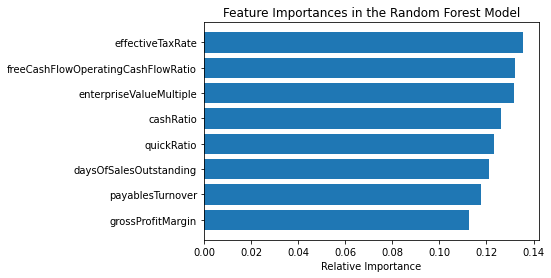

In [1111]:
################ EDIT CODE LINES HERE #################
#####              MULTICOLLINEARITY              #####
FEATURES = DATA.columns[1:]
LABEL = DATA.columns[0]
le = LabelEncoder()
le.fit(DATA.loc[:, LABEL])
DATA.Rating = le.fit_transform(DATA.loc[:, LABEL])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
DATA
X_train, X_test, y_train, y_test = train_test_split(DATA.loc[:, FEATURES], DATA.loc[:, LABEL], test_size=0.2, random_state=0)
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(DATA.loc[:, FEATURES].values, i) for i in range(len(FEATURES))]
VIF_table = pd.DataFrame({'Features': FEATURES, 'VIF': VIF})
featureList = list(VIF_table['Features'])
vifList = list(VIF_table['VIF'])
for i in range(len(VIF_table)):
    if(vifList[i] > 5):
        FEATURES_TO_DROP.append(featureList[i])
DATA = DATA.drop(FEATURES_TO_DROP,axis =1)
X_train = X_train.drop(columns = FEATURES_TO_DROP) # drop feature in the training data set
X_test = X_test.drop(columns= FEATURES_TO_DROP) # drop feature in the testing data set
FEATURES = [f for f in FEATURES if f not in FEATURES_TO_DROP] 

#####             FEATURE IMPORTANCE              #####
from sklearn.ensemble import RandomForestClassifier # importing the random forest module
rf_model = RandomForestClassifier(random_state=0) # define the random forest model
rf_model.fit(X_train, y_train) # fit the random forest model
importances = rf_model.feature_importances_ # get importance
indices = np.argsort(importances) # sort the features' index by their importance scores
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')
#FEATURES_TO_DROP=[FEATURES[i] for i in indices[importances[indices] < 0.025]]
##All features are above 0.025 so none of the financial metrics need to be dropped. 

######################################################



In [1119]:
le_name_mapping

{'A': 0,
 'AA': 1,
 'AAA': 2,
 'B': 3,
 'BB': 4,
 'BBB': 5,
 'C': 6,
 'CC': 7,
 'CCC': 8,
 'D': 9}

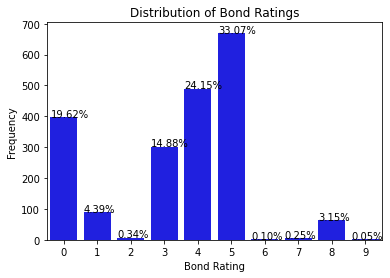

In [1112]:
################ EDIT CODE LINES HERE #################
#####              LABEL IMBALANCES               #####
ax = sns.countplot(x = "Rating", data = DATA, color = 'blue') 
plt.title('Distribution of Bond Ratings')
plt.xlabel('Bond Rating')
plt.ylabel('Frequency')
total = len(DATA["Rating"])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() 
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))
##the values 1,2,6,7,8,9 are all below 5%.
DATA = DATA.loc[DATA['Rating'] !=  1]
DATA = DATA.loc[DATA['Rating'] !=  2 ]
DATA = DATA.loc[DATA['Rating'] !=  6 ]
DATA = DATA.loc[DATA['Rating'] !=  7 ]
DATA = DATA.loc[DATA['Rating'] !=  8 ]
DATA = DATA.loc[DATA['Rating'] !=  9 ]
#Redefining the training and testing variables
X_train, X_test, y_train, y_test = train_test_split(DATA.loc[:, FEATURES], DATA.loc[:, LABEL], test_size=0.2, random_state=0)
#X_test = X_test.drop([DATA['Rating'] != 1 & DATA['Rating'] != 2 & DATA['Rating'] != 6 & DATA['Rating'] != 7 & DATA['Rating'] != 8 & DATA['Rating'] != 9].index,inplace = True)

######################################################

d) Implement at least two classification models to predict the bond ratings based on their financial metrics features, then output their performance results. Why did you choose these methods?

For the first model, I will be implementing a Support Vector Machine using an RBF Kernel. This model will be efficient as this is a high dimensional space as there are many ratings that are going to be classified. The dataset that we are using is also not super large which makes it efficient to test on. Also for the dataset, there is not much noise, as we have preprocessed the data making it normalized and standardized.  The number of training data samples is also greater than the number of features for each training data point. This SVC(RBF Kernel) is also memory efficient which makes it a good model to use in this example. 

In [1113]:
################ IMPLEMENT YOUR FIRST MODEL HERE #################
from sklearn import svm
# build SVC model and choose the Radial Basis Function (RBF) kernel function
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1, probability=True).fit(X_train, y_train)
rbf_pred_train = rbf.predict(X_train)
rbf_pred_test = rbf.predict(X_test)

##################################################################

In [1114]:
################ OUTPUT THE PERFORMANCE RESULTS HERE #################

rbf_train_error= np.mean(rbf_pred_train!=y_train)
rbf_test_error= np.mean(rbf_pred_test != y_test)
print('SVC (RBF Kernel) Training Error = %.3f' % rbf_train_error)
print('SVC (RBF Kernel) Testing Error = %.3f' % rbf_test_error)
rbf_train_accuracy= rbf.score(X_train,y_train)
rbf_test_accuracy= rbf.score(X_test,y_test)
print('SVC (RBF Kernel) Training Accuracy Score = %.3f' % rbf_train_accuracy)
print('SVC (RBF Kernel) Testing Accuracy Score = %.3f' % rbf_test_accuracy)
# storing f1 score
rbf_f1_score= f1_score(y_test, rbf_pred_test, average='weighted')
print(classification_report(y_test, rbf_pred_test))
rbf_pred_test_proba = rbf.predict_proba(X_test)
rbf_auc_score = roc_auc_score(y_test, rbf_pred_test_proba, multi_class='ovr')
print('SVC (RBF Kernel) Classifier: ROC AUC=%.3f' % rbf_auc_score)







######################################################################

SVC (RBF Kernel) Training Error = 0.640
SVC (RBF Kernel) Testing Error = 0.638
SVC (RBF Kernel) Training Accuracy Score = 0.360
SVC (RBF Kernel) Testing Accuracy Score = 0.362
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        94
           5       0.36      1.00      0.53       135

    accuracy                           0.36       373
   macro avg       0.09      0.25      0.13       373
weighted avg       0.13      0.36      0.19       373

SVC (RBF Kernel) Classifier: ROC AUC=0.643


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[Explain why you chose your second model here]
For the second model, I am implementing a random forest model. The random forest model reduces the overfitting issue that is present in the decision tree model. It also reduces variance and improves the accuracy. The only issues with this model is that it takes more time to model, and it's computationally costly with more decision trees. The more decision trees, the more stabilized the algorithm is. This model is also strong and robust to outliers which makes it good to use. 

In [1117]:
################ IMPLEMENT YOUR SECOND MODEL HERE #################

 # Create the parameter grid based on the results of random search 
 # Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
param_grid = {
     'bootstrap': [True],
     'max_depth': [80, 90, 100, 110],
     'max_features': [2, 3],
     'min_samples_leaf': [3, 4, 5],
     'min_samples_split': [8, 10, 12],
     'n_estimators': [100, 200, 300, 1000]
}
 # Create a based model
rf = RandomForestClassifier()
 # Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
 # fit the grid search to the training data
grid_search.fit(X_train, y_train)
grid_search.best_params_



#Create a Random Forest Classifier
rf = RandomForestClassifier(bootstrap= True, max_depth= 110, max_features= 2, min_samples_leaf= 5, min_samples_split= 8, n_estimators= 200)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

# predicted liquidity strengths 
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

##################################################################

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   2.1s
[CV] E

In [1118]:
################ OUTPUT THE PERFORMANCE RESULTS HERE #################

rf_train_error= np.mean(rf_pred_train!=y_train)
rf_test_error= np.mean(rf_pred_test != y_test)
print('Random Forest Training Error = %.3f' % rf_train_error)
print('Random Forest Testing Error = %.3f' % rf_test_error)
rf_train_accuracy= rf.score(X_train,y_train)
rf_test_accuracy= rf.score(X_test,y_test)
print('Random Forest Training Accuracy Score = %.3f' % rf_train_accuracy)
print('Random Forest Testing Accuracy Score = %.3f' % rf_test_accuracy)
rf_f1_score= f1_score(y_test, rf_pred_test, average='weighted')
print(classification_report(y_test, rf_pred_test))
rf_pred_test_proba = rf.predict_proba(X_test)
rf_auc_score = roc_auc_score(y_test, rf_pred_test_proba, multi_class='ovr')
print('Random Forest Classifier: ROC AUC=%.3f' % rf_auc_score)






######################################################################

Random Forest Training Error = 0.115
Random Forest Testing Error = 0.491
Random Forest Training Accuracy Score = 0.885
Random Forest Testing Accuracy Score = 0.509
              precision    recall  f1-score   support

           0       0.69      0.36      0.47        91
           3       0.66      0.40      0.49        53
           4       0.49      0.43      0.45        94
           5       0.45      0.71      0.55       135

    accuracy                           0.51       373
   macro avg       0.57      0.47      0.49       373
weighted avg       0.55      0.51      0.50       373

Random Forest Classifier: ROC AUC=0.738


<p style="color:red;"> Please do add extra code chunks as needed for this problem. </p>

e) Compare your models' performance results from above. What can you conclude from this? Which model perform better?

From looking at the performance metrics, we can suggest that the Random Forest model would perform better than the Support Vector Machine Model using an RBF Kernel. About the two models, we can conclude that they have very high error rates and none of them are really accurate. In our data, we are looking at A level, B level, BB level, and BBB level bond ratings.

The Random Forest Model Maintained a higher training and testing accuracy than the SVC(RBF) model. With a testing accuracy of 0.509 and a testing error of 0.491, the Random Forest Model is not super accurate but is relatively accurate as compared to the SVC model. The Support Vector Machine model with an RBF Kernel has a testing accuracy of 0.362 and testing error of 0.638. This is significantly less accurate than the Random Forest Model. 

The next key performance metric that we are looking at is the F1 score. For the random forest classifier, the model had a slightly better than average predictor for a BBB Bond rating with a 0.55, but a weak and below average for A,B, and BB Bonds. The F1 scores were 0.47, 0.49, and 0.45 respectively.  The SVC(RBF) classifier has weaker ratings for each bond rating prediction. This classifier has an F1 score of 0 for A,B, and BB bonds and 0.53 for BBB Bonds.  The weighted F1 score for the Random Forest Classifier is 0.50 while the weighted F1 score for the SVC(RBF) Classifier is 0.19. This is able to imply that although the Random Forest Classifier is an average predictor for Bond Ratings, it is a significantly better Predictor than the SVC(RBF Classifier. )

The final performance metric that we would be looking at is the Area Under the Curve Score (AUC) The Random Forest Classifier has an AUC of 0.738 which suggests that this classifier is above average but not by a significant amount. On the other hand, the SVC(RBF) Classifier has an AUC OF 0.643 which also suggests that this classifier is abover the average but not by a great amount. We do know that the Random Forest Classifier has a  .095 AUC Score higher than the SVC(RBF) Classifier.

Based on all of the performance metrics of the two models, we can conclude that the Random Forest Classifier is a stronger classifier model than the SVC(RBF) Classifier is the better predictor for Corporate Bond Ratings as it has outperformed the SVC(RBF) classifier in every category.


In [ ]:
################ OPTIONAL SUPPORTING CODE HERE #######################







######################################################################

f) How do you think bond ratings can affect stock prices?

Bond Ratings can affect stock prices in many ways. Bond ratings can indicate how financially stable a stock is and can determine how well a stock would do in the future. A high bond rating will likely indicate that a stock price will go up in the future as the company is financially stable and is attempting to put more money into the future of the corporation. If a company is more financially stable, it has more room to grow as it's stock price likely has a high floor and a high ceiling.  A low bond rating would indicate that a company is less credible and is not so financially stable. This would indicate that the stock may not perform as well in the future as the stock with the high bond rating. Bond Ratings and stock prices are positively correlated with one another. 